In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np 
import pandas as pd 

train_csv = 'train.csv'
test_csv = 'test.csv'

train_data = pd.read_csv(train_csv)
test_data = pd.read_csv(test_csv)


In [3]:
print(train_data.head())

       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative  


In [4]:
print(train_data['sentiment'].value_counts())

sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64


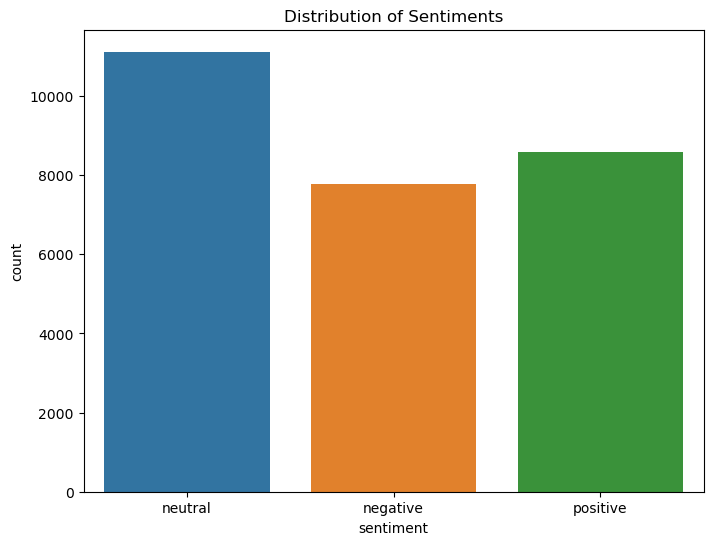

In [5]:
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data=train_data)
plt.title('Distribution of Sentiments')
plt.show()

In [6]:
def preprocess_text(text):
    return text.lower()

train_data['text'] = train_data['text'].fillna('')
test_data['text'] = test_data['text'].fillna('')

In [7]:
X_train, X_val, y_train, y_val = train_test_split(train_data['text'], train_data['sentiment'], test_size=0.2, random_state=42)

In [8]:
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(test_data['text'])

In [9]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
val_predictions = model.predict(X_val_tfidf)

In [11]:
print("Validation Accuracy:", accuracy_score(y_val, val_predictions))
print("Classification Report:\n", classification_report(y_val, val_predictions))

Validation Accuracy: 0.6894669819901764
Classification Report:
               precision    recall  f1-score   support

    negative       0.72      0.60      0.66      1562
     neutral       0.62      0.74      0.68      2230
    positive       0.78      0.70      0.74      1705

    accuracy                           0.69      5497
   macro avg       0.71      0.68      0.69      5497
weighted avg       0.70      0.69      0.69      5497



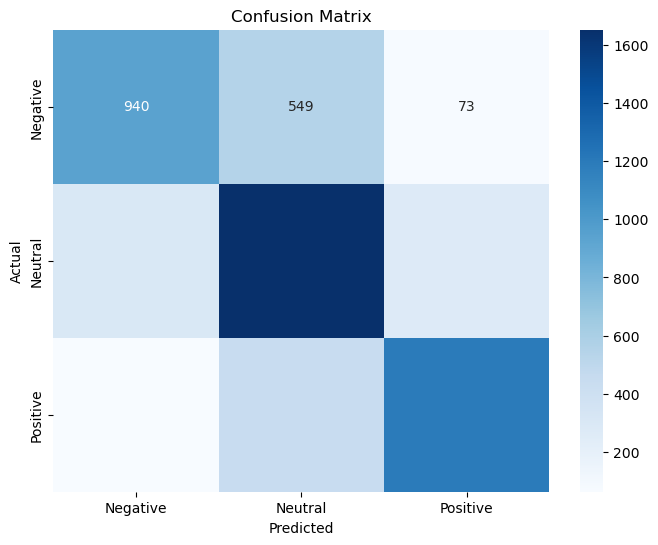

In [12]:
conf_matrix = confusion_matrix(y_val, val_predictions)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
def predict_sentiment(text):
    print(text)
    text = preprocess_text(text)
    text_tfidf = vectorizer.transform([text])
    prediction = model.predict(text_tfidf)[0]
    return prediction

In [14]:
user_input = input("Enter a sentence to analyze sentiment: ")
predicted_sentiment = predict_sentiment(user_input)
print(f"The predicted sentiment for the entered text is: {predicted_sentiment}")

I am a bad boy 
The predicted sentiment for the entered text is: negative
